


<center>
<h1>CSCI3151 - Foundations of Machine Learning</h1>
<h1>Assignment 3</h1>
Winter 2022
</center>




Your assignment is to be submitted as a single `.ipynb` file **(please do not zip it when submitting to brightspace)** including your answers to both the math and the experimental questions, in the correct order, on Brightspace. Use [markdown syntax](https://www.markdownguide.org/cheat-sheet/) to format your answers

Note: in solving the math questions, aim for general (symbolic) solutions and substitute the specific numbers at the end. This demonstrates a solid understanding of the key concepts. 
You can answer the math questions in two ways:
*   **Use LaTeX to typeset the equations**. Section H of [this LaTeX reference sheet](http://tug.ctan.org/info/latex-refsheet/LaTeX_RefSheet.pdf) is a good reference. Here is another [LaTeX reference sheet](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference).
The equations in the questions are typeset in LaTeX, so you can use them as examples. 
*   **Use neat handwriting**, scan your solution using [Camscanner](https://www.camscanner.com/user/download) on your mobile phone, upload the image file, and embed it in your solution notebook. To this end (1) create an empty Markdown cell. 2) Drag-and-drop the image file into the empty Markdown cell, or click on the image icon at the top of the cell and select the image file. The Markdown code that will embed the image, together with its content, then appears.   


Your answers to the experimental questions should be in your solution notebook, in the form of code and text cells, using markdown for your text responses. You should also include the results of running your code. 

The marking criteria are described in rubrics. There are two rubrics, for math questions, and for experimental questions, respectively. 

You can submit multiple editions of your assignment. Only the last one will be marked. It is recommended to upload a complete submission, even if you are still improving it, so that you have something into the system if your computer fails for whatever reason.  

**IMPORTANT**: PLEASE NAME YOUR PYTHON NOTEBOOK FILE AS: 
* `<LAST_NAME>-<FIRST_NAME>-Assignment-N.ipynb`

for example: **Milios-Evangelos-Assignment-3.ipynb** \\


## **1. Multi-class Multi-label classification using Naive Bayes**

In this question you will implement Naive Bayes to classify the topic of newsgroup posts.This method works fairly well for certain text classification tasks. This is indeed the case for newsgroup post classification given that there are words that convey a strong indication of a post belonging to a certain topic.

You will make use of the 20 newsgroup Dataset, which can be found in  sklearn 
(The training subset has been fetched for you). You may want to look at
[sklearn.feature_extraction.text.TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) to convert the words to vector representations.

In [ ]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(remove=('headers','footers','quotes'),subset='train')
# removes whitespaces from data
remove_ws = lambda x: " ".join(x.split())
X_train = list(map(remove_ws,newsgroups_train.data))
y_train = newsgroups_train.target
# uncomment to know more about the dataset
#print(newsgroups_train.DESCR) 


a) First you will build a multi-class (single label) classifier on the above training set. You will be
 using [complement Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.ComplementNB.html#sklearn.naive_bayes.ComplementNB) from sklearn for this task. Make sure you account for the zero counts (smoothing), so that a prediction is not penalized just because it uses a word that is not present in the training set.  

In [ ]:
from numpy import vectorize
from sklearn.naive_bayes import ComplementNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV


#Vectorization built into pipeline and adjusting smoothing param in classifier
model = make_pipeline(TfidfVectorizer(smooth_idf=True), ComplementNB(alpha=0.1))
model.fit(X_train, y_train)



Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('complementnb', ComplementNB(alpha=0.1))])

b) For testing fetch the test subset by passing `subset="test"` in the code above. Report the classification error and plot the confusion matrix.
 Note : Remember to apply identical tranformation to the test subset as the training subset before inference.





Classification Error: 0.29


Text(73.69999999999999, 0.5, 'predicted label')

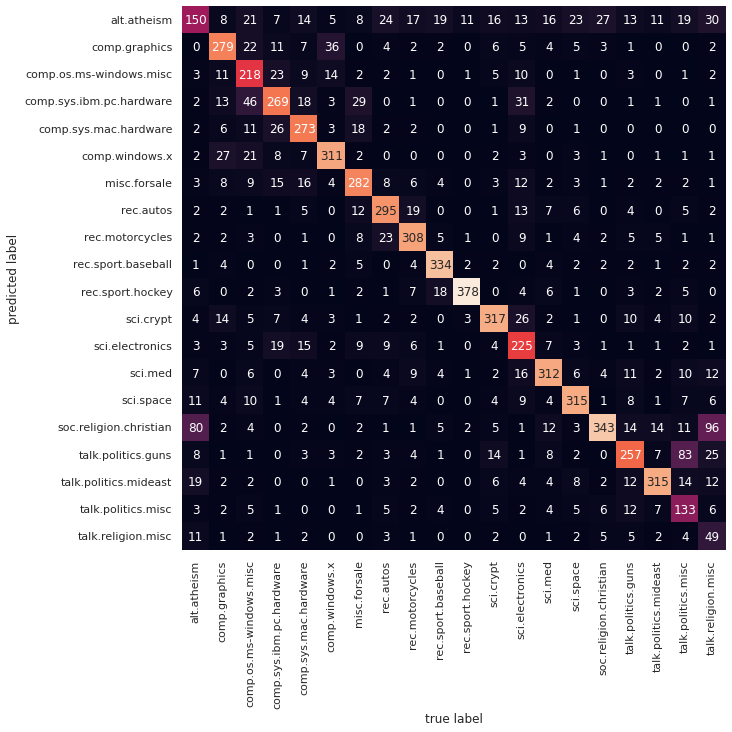

In [ ]:
from seaborn.axisgrid import Grid

newsgroups_test = fetch_20newsgroups(remove=('headers','footers','quotes'),subset='test')
#removes whitespaces from data
remove_ws = lambda x: " ".join(x.split())
X_test = list(map(remove_ws,newsgroups_test.data))
y_test = newsgroups_test.target
labels = model.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
#Printing classification error and confusion matrix
clas_error = round((1 - accuracy_score(y_test, labels)), 2)
print("Classification Error: {}".format(clas_error))
mat = confusion_matrix(y_test, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=newsgroups_train.target_names, yticklabels=newsgroups_test.target_names)
sns.set(rc = {'figure.figsize':(15,15)})
plt.xlabel('true label')
plt.ylabel('predicted label')



c) Using the same trained model in (a) apply appropriate sklearn method to build a multi-label classifier. Predict the top 2 labels for atleast 10 samples taken from the test subset.

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
import numpy as np
clf = OneVsRestClassifier(model)
clf.fit(X_train, y_train)


OneVsRestClassifier(estimator=Pipeline(steps=[('tfidfvectorizer',
                                               TfidfVectorizer()),
                                              ('complementnb',
                                               ComplementNB(alpha=0.1))]))

In [ ]:
from operator import index
pred = clf.predict_proba(X_test)
def predictTopLabels(arr, i):
  categorys = newsgroups_test.target_names
  maxVal1 = np.argsort(arr, axis=0)[-1]
  maxVal2 = np.argsort(arr, axis=0)[-2]
  
  print("Test instance: {}".format(i))
  print("Predicted labels: {}, {}".format(categorys[maxVal1],categorys[maxVal2]))
  print("True Label: {}\n".format(categorys[y_test[i]]))
  
#get best percentages from 10 samples
predictTopLabels(pred[0], 0)
predictTopLabels(pred[1], 1)
predictTopLabels(pred[2], 2)
predictTopLabels(pred[3], 3)
predictTopLabels(pred[4], 4)
predictTopLabels(pred[5], 5)
predictTopLabels(pred[6], 6)
predictTopLabels(pred[7], 7)
predictTopLabels(pred[8], 8)
predictTopLabels(pred[9], 9)



Test instance: 0
Predicted labels: rec.autos, comp.sys.mac.hardware
True Label: rec.autos

Test instance: 1
Predicted labels: comp.graphics, comp.windows.x
True Label: comp.windows.x

Test instance: 2
Predicted labels: soc.religion.christian, alt.atheism
True Label: alt.atheism

Test instance: 3
Predicted labels: talk.politics.mideast, talk.politics.guns
True Label: talk.politics.mideast

Test instance: 4
Predicted labels: alt.atheism, talk.religion.misc
True Label: talk.religion.misc

Test instance: 5
Predicted labels: sci.med, soc.religion.christian
True Label: sci.med

Test instance: 6
Predicted labels: soc.religion.christian, talk.politics.misc
True Label: soc.religion.christian

Test instance: 7
Predicted labels: comp.os.ms-windows.misc, sci.electronics
True Label: soc.religion.christian

Test instance: 8
Predicted labels: comp.windows.x, comp.os.ms-windows.misc
True Label: comp.windows.x

Test instance: 9
Predicted labels: comp.graphics, comp.os.ms-windows.misc
True Label: comp.g

## **2. Clustering**

In this question we are going to explore two different clustering methods on the [Wine Dataset](https://archive.ics.uci.edu/ml/datasets/seeds) and evaluate it using two measures: one is an intrinsic measure (no labels), while the other one makes use of the available labels.


In [ ]:

# input data
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import silhouette_score
import numpy as np

wine = datasets.load_wine()

X = wine.data # 178 instances, 13 features
y = wine.target # target, 3 classes 

test = wine.data



**a**) Cluster the dataset using the [Agglomerative Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html), and [k-Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) clustering algorithm without using the class information as part of the features. Experiment with different numbers of clusters ranging from 2 to 5. 



In [ ]:
from pandas.core.common import random_state
from sklearn import cluster
import matplotlib.pyplot as plt
from itertools import cycle, islice
import seaborn as sns

#https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c
#https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
#Generating Kmeans and agglomerative clustering models with 2-5 clusters
#recording sil coef. for each model and storing in respective arrays
n_clusters = np.arange(2, 6)
kmeansModels = [KMeans(n_clusters=n)for n in n_clusters]
aggloModels = [AgglomerativeClustering(n_clusters=n)for n in n_clusters]

kmeansSilCof = [silhouette_score(X, model.fit_predict(X)) for model in kmeansModels]
aggloSilCof = [silhouette_score(X, model.fit_predict(X)) for model in aggloModels]

b) What is the variability of the resulting clusters as a function of different initializations or parameterization? Use the Silhouette coefficient and Adjusted Rand Index as metrics for evaluation to discuss the stability of results.

In [ ]:
kmeansRandIndex = []
#Generating kmeans asjusted rand index array
for kmod in kmeansModels:
  kmeansRandIndex.append(adjusted_rand_score(y, kmod.labels_))
aggloRandIndex = []
#Generating Agglomerative asjusted rand index array
for amod in aggloModels:
  aggloRandIndex.append(adjusted_rand_score(y, amod.labels_))
print("Kmeans Adjusted Rand Index Variance: {}".format(np.var(kmeansRandIndex)))
print("Kmeans Silhouette Coefficient Variance: {}".format(np.var(kmeansSilCof)))
print("Agglomerative Adjusted Rand Index Variance: {}".format(np.var(aggloRandIndex)))
print("Kmeans Silhouette Coefficient Variance: {}".format(np.var(aggloSilCof)))


Kmeans Adjusted Rand Index Variance: 0.0010026217793471447
Kmeans Silhouette Coefficient Variance: 0.0018113338404816218
Agglomerative Adjusted Rand Index Variance: 0.00321732377267537
Kmeans Silhouette Coefficient Variance: 0.0029665694140736387


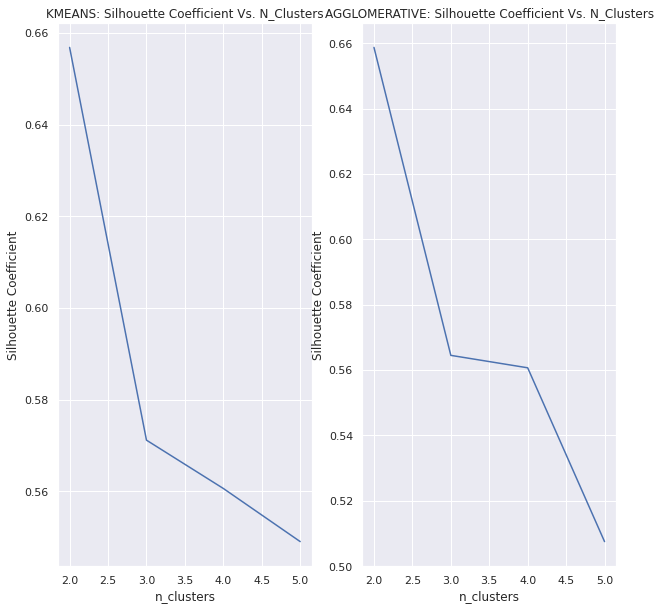

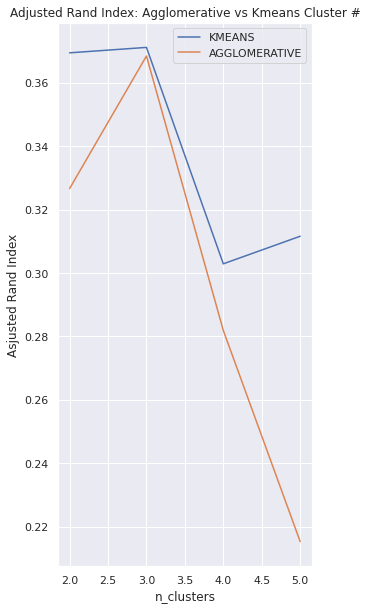

In [ ]:
#Plotting KMEANS sil coef. vs n_clusters
sns.set(rc = {'figure.figsize':(10,10)})
plt.subplot(1, 2, 1)
plt.title("KMEANS: Silhouette Coefficient Vs. N_Clusters")
plt.xlabel('n_clusters')
plt.ylabel('Silhouette Coefficient')
plt.plot(n_clusters, kmeansSilCof);
#Plotting AGGLO sil coef. vs n_clusters
plt.subplot(1, 2, 2)
plt.title("AGGLOMERATIVE: Silhouette Coefficient Vs. N_Clusters")
plt.xlabel('n_clusters')
plt.ylabel('Silhouette Coefficient')
plt.plot(n_clusters, aggloSilCof);
plt.show()



#Plotting AGGLO sil coef. vs n_clusters
plt.subplot(1, 2, 2)
plt.title("Adjusted Rand Index: Agglomerative vs Kmeans Cluster #")
plt.xlabel('n_clusters')
plt.ylabel('Asjusted Rand Index')
plt.plot(n_clusters, kmeansRandIndex, label="KMEANS");
plt.plot(n_clusters, aggloRandIndex, label="AGGLOMERATIVE");

leg = plt.legend(loc='upper right')

plt.show()

As seen from the graphs above, both algorithms output their highest silhouette coefficients when there are only 2 clusters. On the contrary we can see that both algorithms give the highest adjusted_rand_index when there are 3 clusters generated. Since the asjusted rand index is a similarity measure between the predicted clusters and the true cluster values, we can conclude that the results are the most stable at 3 clusters and can infer that the data set most likely has 3 classes. The silhouete score contradicts this but that is because it is measuring how close each point in one cluster is to its neighboring clusters. This can tell us that 2 classes are very similiar but not necisarily the optimal number of clusters.

c) Based on the Silhouette coefficient, discuss (i) which clustering method you would pick, (ii) how many clusters you would use for your data.

Make sure that appropriate visualizations are used to support the analysis.


For n_clusters = 2 The average silhouette_score is : 0.6568536504294317
For n_clusters = 3 The average silhouette_score is : 0.5711381937868838
For n_clusters = 4 The average silhouette_score is : 0.560594106006062
For n_clusters = 5 The average silhouette_score is : 0.5489993239795675


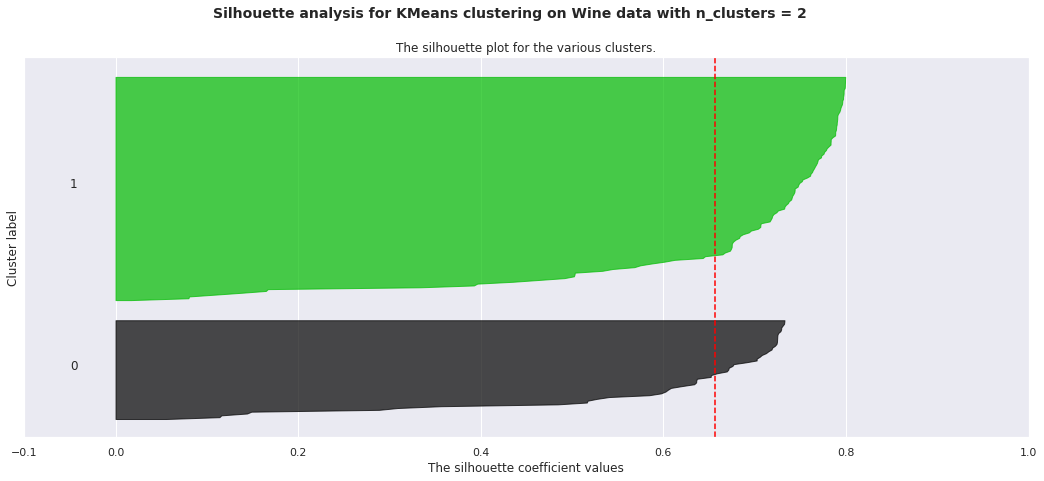

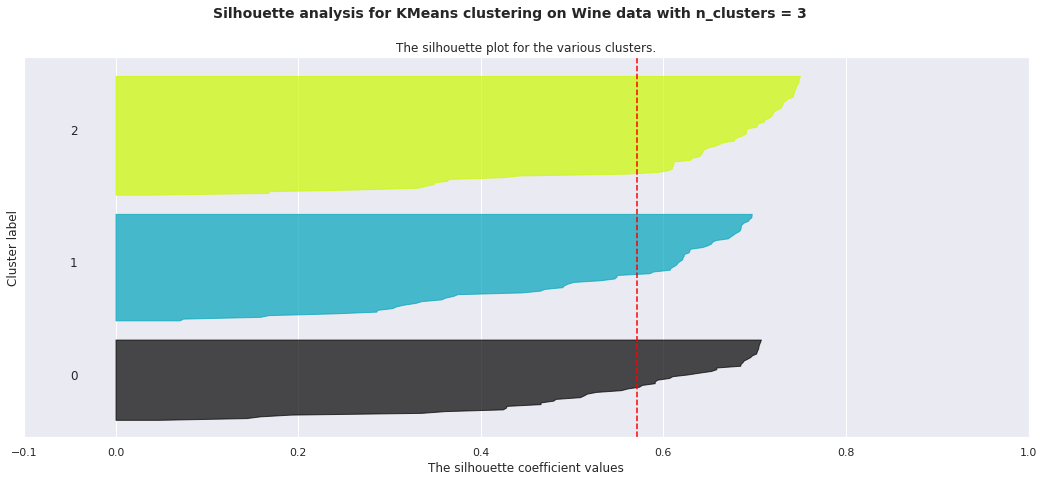

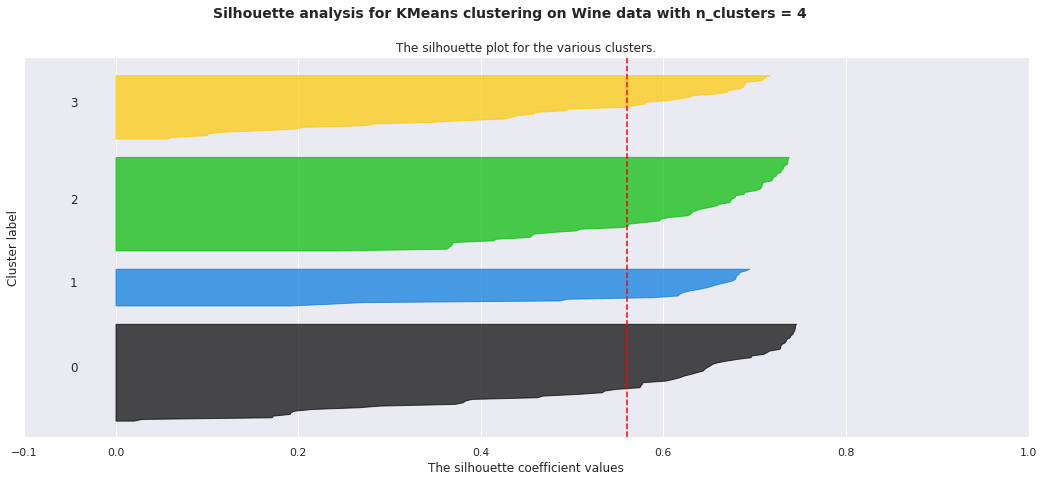

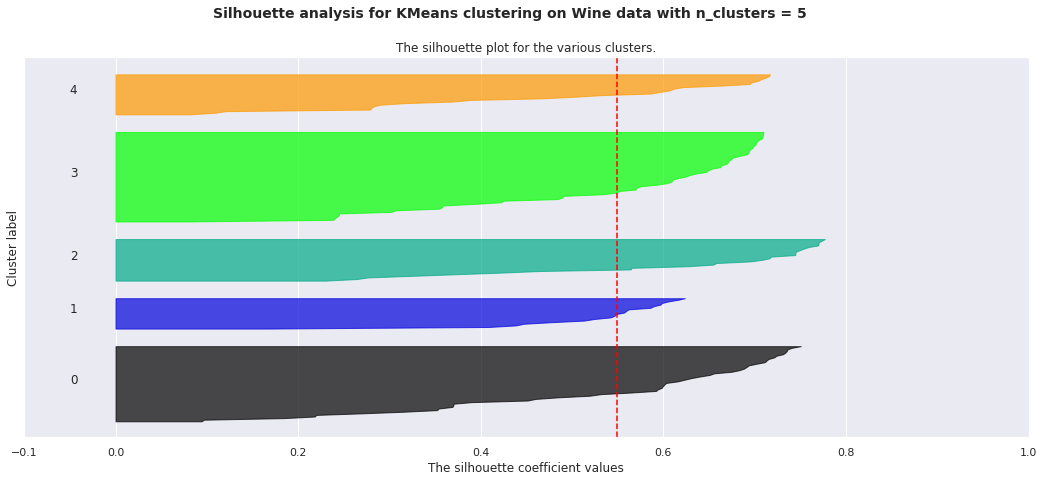

In [ ]:
#CODE FROM TUTORIAL 10
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
range_n_clusters = [2, 3, 4, 5]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        # This changes the default colormap as well as the colormap of the current image if there is one
        color = cm.nipy_spectral(float(i) / n_clusters)
        
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on Wine data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
plt.show()


For n_clusters = 2 The average silhouette_score is : 0.6587292996216912
For n_clusters = 3 The average silhouette_score is : 0.5644796401732068
For n_clusters = 4 The average silhouette_score is : 0.560672694839426
For n_clusters = 5 The average silhouette_score is : 0.5074843044233786


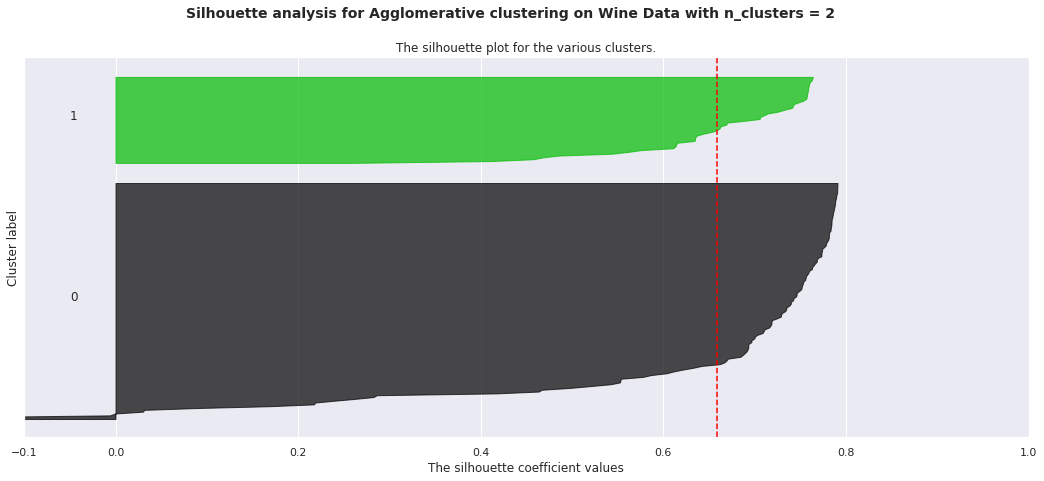

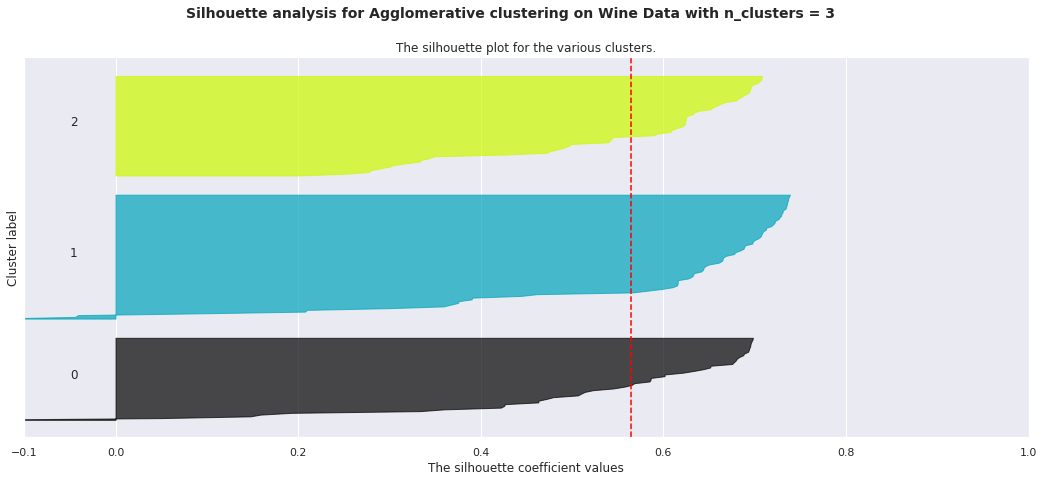

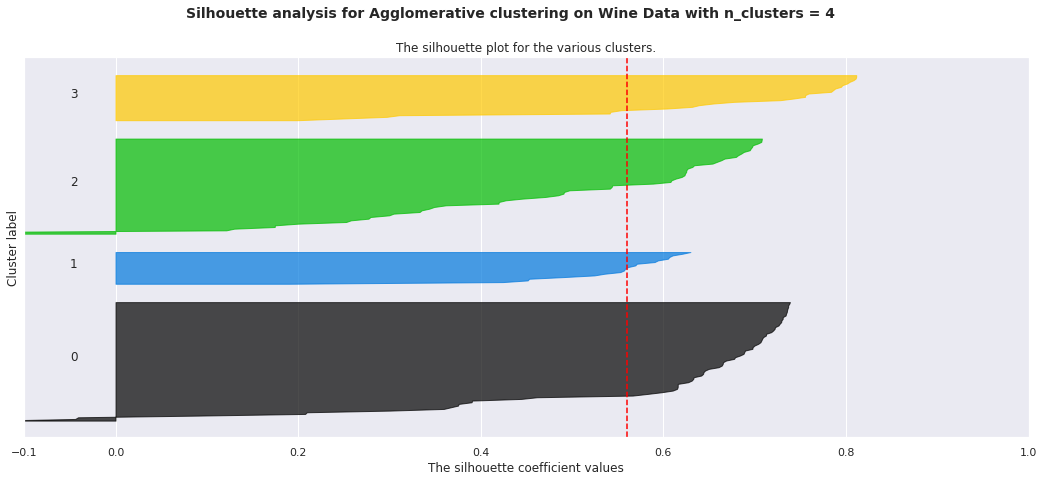

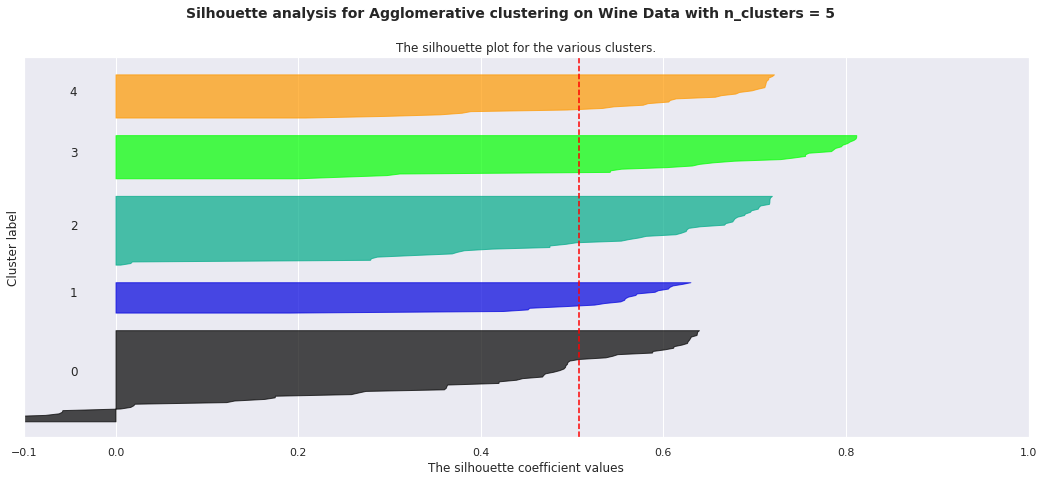

In [ ]:
#CODE FROM TUTORIAL 10
range_n_clusters = [2, 3, 4, 5]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        # This changes the default colormap as well as the colormap of the current image if there is one
        color = cm.nipy_spectral(float(i) / n_clusters)
        
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for Agglomerative clustering on Wine Data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
plt.show()

Based on the silhouette coeefficients and visualizations above, I am able to conclude that the KMeans algorithm is the one I would choose as it has the better silhouette coeeficient for the optimal number of clusters. I was also able to determine the optimal number of clusters by assessing the graph and finding 3 clusters to have the most even weighting between clusters. Similiar to problem discussed above of have 2 clusters very similar to each other, we can see that cluster 1 in the KMEANS n=2 graph is much bigger than the other cluster. When n = 3 that cluster seemsto seperate into 2 which gets rid of our issue of 2 clusters being similar. Past n=3 the clustering becomes uneven and some clusters nearly go below the average silhouete score which is why we can confirm 3 clusters to be optimal.

## **3. Gaussian Mixture Model**



It’s year 2120 and you work as a space taxi driver. One day, you suddenly get lost and find a
new small inhabited planet, which looks like a so far unknown civilization. You meet the planet
prime minister who explains to you that different alien races joined to live on this planet
peacefully. Although the different races look similar, the prime minister explains: “It’s not
clear-cut, but the race can be fairly well distinguished by looking at an alien's height and weight”.
You spent a good amount of time chatting and laughing with the prime minister until you
realized that you had passengers waiting to be picked up.

A few years later, you find that there is a lot of interest in knowing more about this planet, how
many races there are, and what their different races look like. You never managed to find that
planet again (as you know, planets move around). You are clearly not good at memorizing data,
but luckily, the prime minister shared with you the last census data (aliens.csv), which contains
aliens’ heights and weights in meters and kilograms, respectively. Would you be able to infer
how many races there are and what their characteristics are?

a) Run a Gaussian Mixture Model, so that you can identify the different races in the civilization.
Vary the number of components from 2 to 7. Use the [Akaike information criterion](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture.aic) (AIC) to
provide a metric of the goodness of the approximation for each. Indicate the most likely number
of races.

In [ ]:
# Load data
import pandas as pd
from google.colab import files
import io
# Upload file (Tutorial 1)
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['aliens.csv']), header=None)

Saving aliens.csv to aliens (5).csv


5.056536434397618


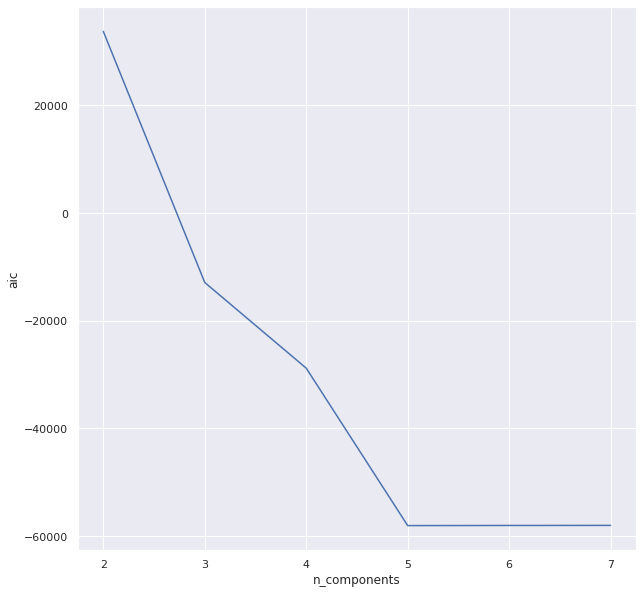

In [ ]:
from pandas.core.frame import DataFrame
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
#https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
#Sources referenced to plot aic vs components
#Generating 6 Gaussian Mixture models with components 2-7 and computing aic for each mdoel
n_components = np.arange(2, 8)
models = [GaussianMixture(n_components=n, random_state=0)for n in n_components]
aics = [model.fit(df).aic(df) for model in models]
print(models[4].fit(df).score(df))
sns.set(rc = {'figure.figsize':(10,10)})
plt.xlabel('n_components')
plt.ylabel('aic')
plt.plot(n_components, aics);


Given from the graph above, AIC is at a minimum from 5 on so we can therefore approximate that there is most likely 5 races.

b) Using the most probable number of races (# gaussians) based on AIC, plot in a scatter plot of
all your points (heights and weights) where the color of each point is defined by the Gaussian
with the highest posterior probability.

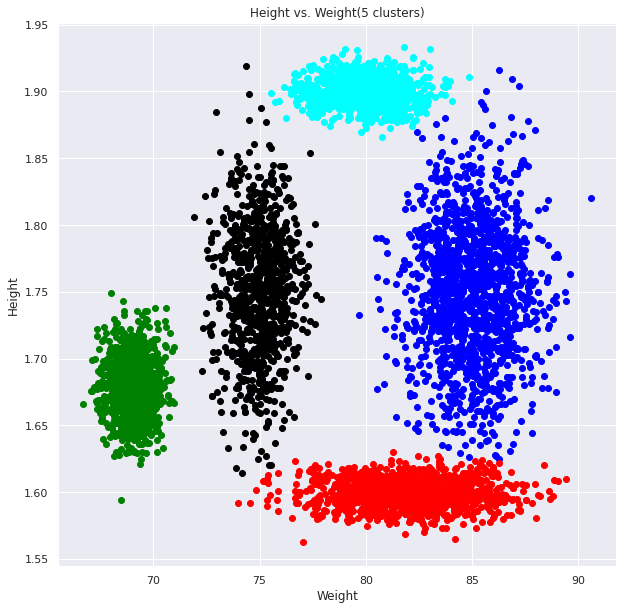

In [ ]:
#https://www.analyticsvidhya.com/blog/2019/10/gaussian-mixture-models-clustering/
#Source Used to reference plotting
numComp = 5
#Putting data into a frame with added column 'cluster' refering to each predicted cluster of each transaction
frame = DataFrame(df)
gmm = GaussianMixture(n_components=numComp, random_state=0).fit(df)
labels = gmm.predict(df)
frame = pd.DataFrame(df)
frame['cluster'] = labels
frame.columns = ['height', 'weight', 'cluster']
frame['cluster']
#Plotting clustering
color=['blue','green','cyan','black','red','yellow','purple']
for k in range(0,numComp):
    data = frame[frame["cluster"]==k]
    plt.title("Height vs. Weight(5 clusters)")
    plt.scatter(data["weight"],data["height"],c=color[k])
    plt.xlabel("Weight")
    plt.ylabel("Height")
plt.show()


C) Compare and contrast the above method with [Bayesian Gaussian Mixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.BayesianGaussianMixture.html) Model of sklearn starting with the default parameters, and experimenting as needed.

[-1.9288218215191497, -1.5301933868126663, -1.217977833391328, -0.9274027553266876, -0.9279664576434655, -0.9274927130607297]


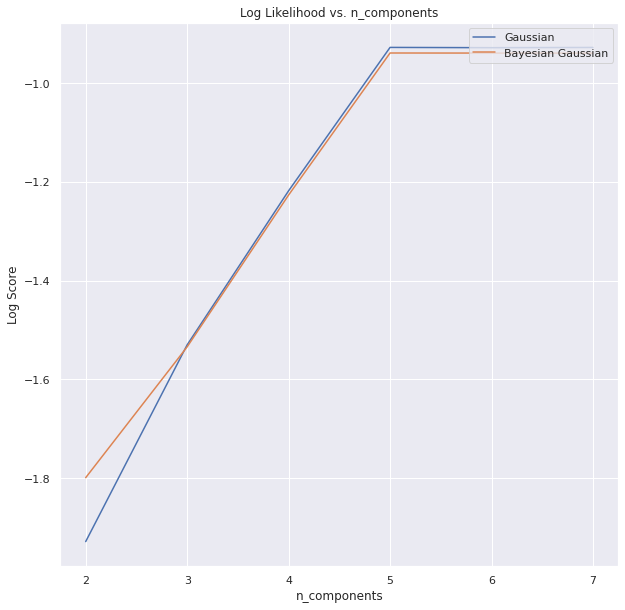

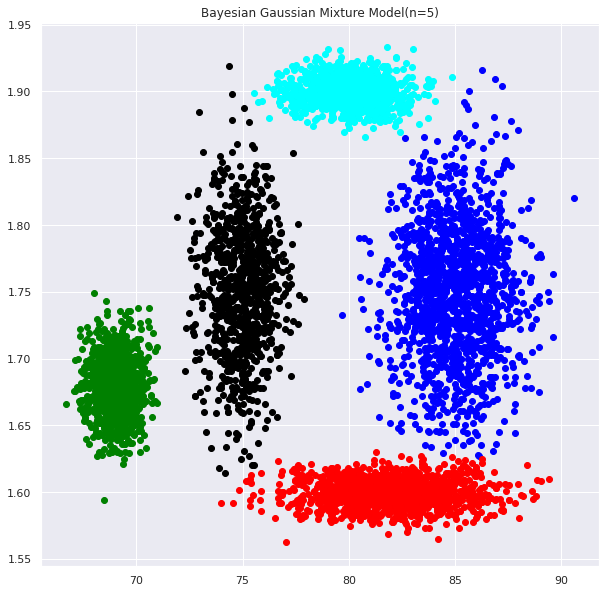

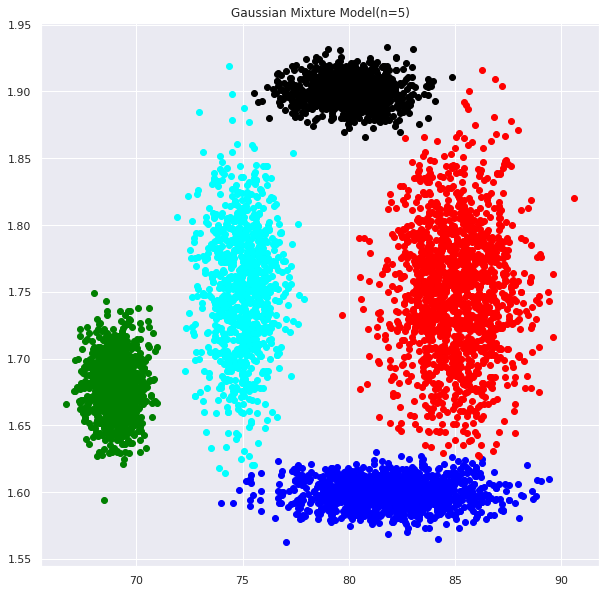

In [ ]:
from sklearn.mixture import BayesianGaussianMixture
n_components = np.arange(2, 8)
#generating models for baysesian and gaussian mixture models with clusters 2-7 and log likelihood scores of each model
bayModels = [BayesianGaussianMixture(n_components=n, random_state=0)for n in n_components]
bayScores = [model.fit(df).score(df) for model in bayModels]
gausModels = [GaussianMixture(n_components=n, random_state=0)for n in n_components]
gausScores = [model.fit(df).score(df) for model in gausModels]
print(gausScores)
#Plotting 
plt.title("Log Likelihood vs. n_components")
plt.xlabel('n_components')
plt.ylabel('Log Score')
plt.plot(n_components, gausScores, label="Gaussian");
plt.plot(n_components, bayScores, label="Bayesian Gaussian");
leg = plt.legend(loc='upper right')
plt.show()

#Displaying Bayesian Gaussian Mixture Model Plot
numComp = 5
frame = DataFrame(df)
bgmm = BayesianGaussianMixture(n_components=numComp, random_state=0).fit(df)
labels = bgmm.predict(df)
frame = pd.DataFrame(df)
frame['cluster'] = labels
frame.columns = ['height', 'weight', 'cluster']
frame['cluster']
color=['blue','green','cyan','black','red','yellow','purple']
plt.title("Bayesian Gaussian Mixture Model(n=5)")
for k in range(0,numComp):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["weight"],data["height"],c=color[k])
  
plt.show()
#Displaying Gaussian Mixture Model Plot
frame = DataFrame(df)
bgmm = GaussianMixture(n_components=numComp, random_state=0).fit(df)
labels = bgmm.predict(df)
frame = pd.DataFrame(df)
frame['cluster'] = labels
frame.columns = ['height', 'weight', 'cluster']
frame['cluster']
color=['blue','green','cyan','black','red','yellow','purple']
plt.title("Gaussian Mixture Model(n=5)")
for k in range(0,numComp):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["weight"],data["height"],c=color[k])
  
plt.show()


When comparing the Bayesian Gaussian Mixture Model with the Gaussian Mixture model, I found some key distinctions between the two. The most notable being that the Bayesian Gaussian Mixture model did not have the aic() method or another method like. Aic was the way I found the optimal number of clusters for the algorithm so I found it difficult when comparing the 2 algorithms as the Bayesian mdoel did not have a metric for the goodness of approximation. I decided to plot the log likehood between the 2 models but found that metrix to be nearly the same between the 2 models. When plotting the models, I could not visibly see a difference between the clusering other than a slight change in colours between clusters.